In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [2]:
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)

In [3]:

file = '/g/data/jh2/av5889/quokka_myrepo/quokka/extern/grackle_data_files/input/CloudyData_UVB=HM2012.h5'
# file = '/g/data/jh2/av5889/quokka_myrepo/quokka/extern/grackle_data_files/input/CloudyData_UVB=FG2011.h5'
#Dim2 is redshift. Dim1 is density. Dim3 is temperature
grackle = h5py.File(file)
array = grackle['CoolingRates/Primordial/MMW'][()]
#density(1.e-6, 1.e4), redshift(0,15), temperature(10., 1.e9)
table = array[:,0,:]
table_nH   = np.logspace(-10, 4, array.shape[0])
table_temp = np.logspace(1,  9, array.shape[2])

prim_heating = grackle['CoolingRates/Primordial/Heating'][()][:,0,:]
prim_cooling = grackle['CoolingRates/Primordial/Cooling'][()][:,0,:]

met_heating  = grackle['CoolingRates/Metals/Heating'][()][:,0,:]
met_cooling  = grackle['CoolingRates/Metals/Cooling'][()][:,0,:]

netLambda_prim =  - prim_cooling 

netLambda_met  = - met_cooling
netLambda_Zsol = prim_cooling + met_cooling


In [4]:
LambdaZsol = interpolate.interp2d(table_temp, table_nH, netLambda_Zsol,\
                              kind='linear', copy=True, bounds_error=False, fill_value=None)

# Get Mu

In [29]:

i=0
bins = 200
egas_arr = np.logspace(-23., -5., bins)
nH_arr   = np.logspace(-8.0, 4.0, int(bins))
T = np.zeros((egas_arr.shape[0],nH_arr.shape[0]))

for egas in egas_arr:
    j=0
    for nH in nH_arr:
        C = (gamma - 1.) * egas / (boltzmann_constant_cgs*nH)
        minT = C*np.amin(table)
        maxT = C*np.amax(table)
        mu = interpolate.RegularGridInterpolator((table_nH, table_temp), table,\
                                                  method='quintic', bounds_error=False, fill_value=None)
#         mu = interpolate.interp2d(table_temp, table_nH, table,\
#                               kind='linear', copy=True, bounds_error=False, fill_value=None)
        def func(T):
            return C*mu((nH,T)) - T
        valmin = C*mu((nH, minT)) - minT
        valmax = C*mu((nH, maxT)) - maxT
        if(i==0 and j==173):
            print(egas, nH)
            print(valmin, valmax)
            print(minT,maxT)
            print("C=", C)
            print(mu((nH, minT)), mu((nH, maxT)))
  
        T[i,j] = scipy.optimize.toms748(func, minT, maxT)
        j+=1
    i+=1

    
# temperature_table = interpolate.RectBivariateSpline(egas_arr, nH_arr, T)


ValueError: Method 'quintic' is not defined

In [ ]:
1e-23 270.49597304631317
1.1927480779565255e-10 4.3670947838029474e-15
1.0933556823343437e-10 2.2860600893430089e-10
C= 1.7859481677270685e-10
1.2800504525281582 1.2800504525281458

In [8]:
Valmin, valmax= 1.1927480779565255e-10 4.3670947838029474e-15 0 173
minT, maxT= 1.0933556823343437e-10 2.2860600893430089e-10
C= 1.7859481677270685e-10
mumin= 1.2800504525281582  mumax= 1.2800504525281458

(1e-23, 5.542664520663096)

In [6]:
mu_interp = interpolate.interp2`d(table_temp, table_nH, table,\
                              kind='linear', `acopy=True, bounds_error=False, fill_value=None)

# Load Data

In [26]:
Zsim = 0.2
# Zsim = 1.0
temp = []
if (Zsim == 0.2):

    infile   = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R4-0.2Zsol/slice-6690000-xz.h5'
    hf = h5py.File(infile ,'r')
    rho_gas = hf['Rho'][:]
    rhoZ = hf['RhoZ'][:]
    eint = hf['IntEnergy'][:]
    xrange = hf['Xrange'][:]
    zrange = hf['Zrange'][:]
    temp = hf['Temperature'][:]

if (Zsim == 1.0):
    infile   = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/slice-6000000.h5'
#     infile   = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/chunk-disc-6000000.h5'
    hf = h5py.File(infile ,'r')
    rho_gas = hf['Rho'][:]
    rhoZ = hf['RhoZ'][:]
    eint = hf['IntEnergy'][:]
    xrange = hf['Xrange'][:]
    zrange = hf['Zrange'][:]
#     temp = hf['Temperature'][:]

In [7]:
# Zsim = 0.2
Zsim = 1.0
temp = []

if (Zsim == 1.0):
    infile   = '/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/tcool-temp-disc.h5'
    hf = h5py.File(infile ,'r')
    temp = hf['Temperature'][:]
    tcool_ratio = hf['TcoolRatio'][:]
    tcool_tdyn = hf['TcoolTdyn'][:]


In [94]:
if(np.size(temp)<1):
    file = '/g/data/jh2/av5889/quokka_myrepo/quokka/extern/grackle_data_files/input/CloudyData_UVB=FG2011.h5'
    grackle = h5py.File(file)
    array = grackle['CoolingRates/Primordial/MMW'][()]
    #density(1.e-6, 1.e4), redshift(0,15), temperature(10., 1.e9)
    table = array[:,0,:]
    table_nH   = np.logspace(-10., 4, array.shape[0])
    table_temp = np.logspace(1,  9, array.shape[2])
    i=0
    bins = 200
    egas_arr = np.logspace(-25., -5., bins)
    nH_arr   = np.logspace(-7.0, 4.0, int(bins))
    T = np.zeros((egas_arr.shape[0],nH_arr.shape[0]))

    for egas in egas_arr:
        j=0
        for nH in nH_arr:
            C = (gamma - 1.) * egas / (boltzmann_constant_cgs*nH)
            minT = C*np.amin(table)
            maxT = C*np.amax(table)
            def func(T):
                mu = interpolate.interp2d(table_temp, table_nH, table,\
                                  kind='linear', copy=True, bounds_error=False, fill_value=None)
                return C*mu(T,nH)[0] - T

            T[i,j] = scipy.optimize.toms748(func, minT, maxT)
            j+=1
        i+=1
    egas0=eint
    density = rho_gas
    cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
    rho0 = density*cloudy_H_mass_fraction/hydrogen_mass_cgs


    logrho_arr = np.log10(nH_arr[:-1])
    logrho     = np.log10(rho0)
    delta_rho  = logrho_arr[1] - logrho_arr[0]
    idxrho     = (np.floor((logrho - np.amin(logrho_arr))/delta_rho)).astype('int')

    logEgas_arr = np.log10(egas_arr[:-1])
    logEgas     = np.log10(egas0)
    delta_egas  = logEgas_arr[1] - logEgas_arr[0]

    idxegas     = (np.floor((logEgas-np.amin(logEgas_arr))/delta_egas)).astype('int')


    wgt_rho  = (logrho - (np.amin(logrho_arr) + delta_rho*idxrho))/delta_rho
    wgt_egas = (logEgas - (np.amin(logEgas_arr) + delta_egas*idxegas))/delta_egas

    temp = (1.-wgt_rho)*(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho)]   +\
               wgt_rho *    wgt_egas * T[tuple(idxegas+1), tuple(idxrho+1)] +\
          (1. -wgt_rho)*    wgt_egas * T[tuple(idxegas+1), tuple(idxrho)]   +\
               wgt_rho *(1.-wgt_egas)* T[tuple(idxegas)  , tuple(idxrho+1)]  
np.size(temp)

2097152

In [27]:
rhoH = rho_gas * cloudy_H_mass_fraction
nH =  rhoH / (mp + m_e)
mu = np.zeros(temp.shape)
for i in range(temp.shape[0]):
    for j in range(temp.shape[1]):
        mu[i,j]  = np.vectorize(mu_interp)(temp[i,j].ravel(), nH[i,j].ravel())

# Metal Cooling

In [28]:
rhoH = rho_gas * cloudy_H_mass_fraction
nH =  rhoH / (mp + m_e)
lambdaZsol = np.zeros(temp.shape)
for i in range(temp.shape[0]):
    lambdaZsol[i]  = np.vectorize(LambdaZsol)(temp[i].ravel(), nH[i].ravel())

In [29]:
edot_tot = Zsim * (rhoH*rhoH*lambdaZsol/mp/mp)
tcool_Zsim = eint/np.abs(edot_tot)

In [30]:
Zmet = Zsim + (rhoZ*Msun/rho_gas /1.e3 /8.6e-3)
edot_tot_true = Zmet*(rhoH*rhoH*lambdaZsol/mp/mp)
tcool_true = eint/np.abs(edot_tot_true)

In [31]:
cs = np.sqrt(1.4*boltzmann_constant_cgs * temp/mu/rho_gas)
tdyn = 4.*kpc/cs

In [32]:
tcool_ratio = (tcool_Zsim/tcool_true)
tcool_tdyn = tcool_true/tdyn
weights = tcool_Zsim/tcool_true

In [33]:
bins = 100

tedges = np.linspace(2, 9, bins)  # Log-spaced bins for temperature (e.g., 10^4 to 10^8 K)
ratio_edges = np.linspace(-2, 2, bins )

mass = (rho_gas*(2*pc)**3)
htot, binx, biny = np.histogram2d( np.log10(temp).reshape(-1,1)[:,0], np.log10(tcool_ratio).reshape(-1,1)[:,0],\
                                    bins=[tedges, ratio_edges], weights=mass.reshape(-1,1)[:,0])
np.amax(htot)/Msun, np.amin(htot[htot>0.0])/Msun

(59737.87458133279, 0.00024589892654803733)

/jobfs/131565034.gadi-pbs/ipykernel_1229027/2222373087.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(binx[:-1], biny[:-1] , np.transpose(htot)/Msun,\


Text(0, 0.5, '$t_{{\\rm cool},{Z_{\\odot}}}/t_{{\\rm cool},Z}$')

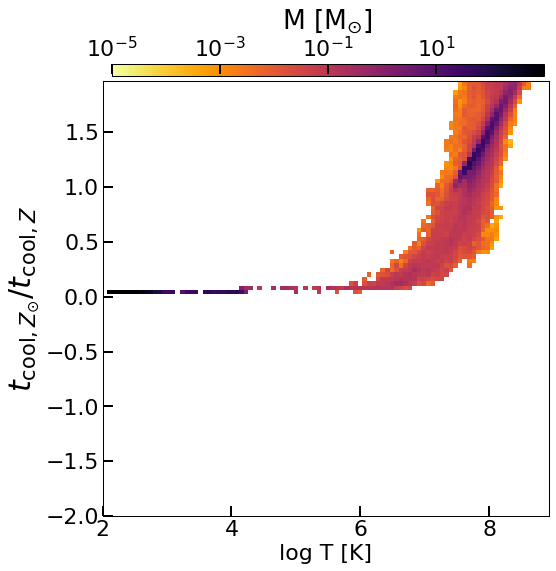

In [34]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.75
dx1 = 0.4
cbtitlex = 0.1

plot = ax.pcolormesh(binx[:-1], biny[:-1] , np.transpose(htot)/Msun,\
                     norm=mcolors.LogNorm(vmin=1.e-5, vmax=1.e3),cmap='inferno_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-5, 1.e-3, 1.e-1, 1.e1))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M [M$_{\odot}$]')
ax.set_xlabel('log T [K]')
ax.set_ylabel(r"$t_{{\rm cool},{Z_{\odot}}}/t_{{\rm cool},Z}$", fontsize=30)
# ax.set_xlim(4.0, 9.0)

Text(0.08, 0.9, '$|z|>1$ kpc')

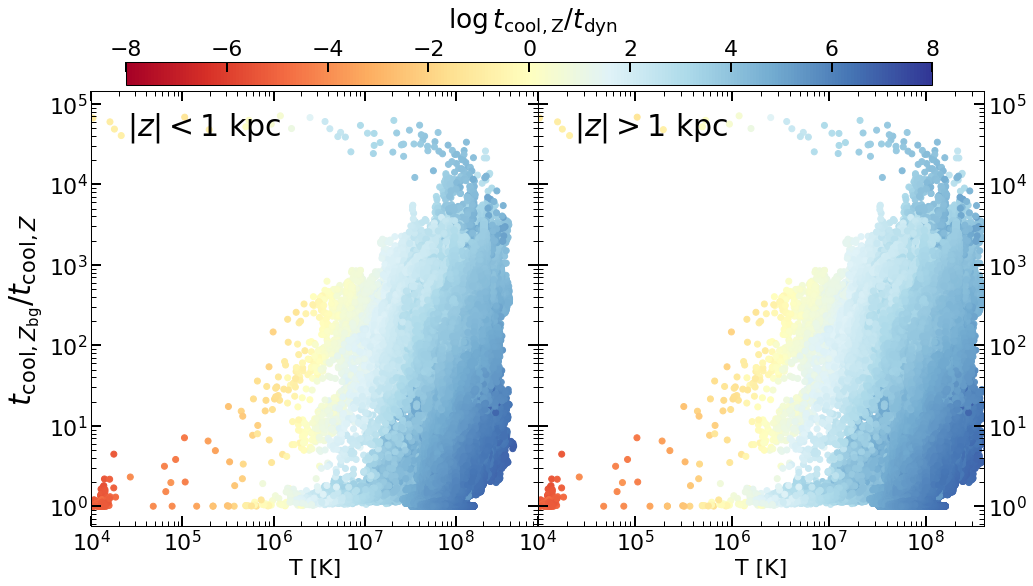

In [19]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(16,8))

cbarx = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7

dx1 = 0.4
cbtitlex = 0.1


plot = ax[0].scatter(temp.flatten(), tcool_ratio.flatten(), \
                        c=np.log10(tcool_tdyn).flatten(), 
                        cmap='RdYlBu', vmin=-8, vmax=8.)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-8, -6, -4, -2.,  0.0,  2., 4.0, 6.0, 8.0 ))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\log t_{\rm cool,Z}/ t_{\rm dyn}$")



plot = ax[1].scatter(temp.flatten(), tcool_ratio.flatten(), \
                        c=np.log10(tcool_tdyn).flatten(), 
                        cmap='RdYlBu', vmin=-8, vmax=8.)


ax[0].tick_params(axis='y', which='both', right=True, left=True)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

ax[0].tick_params(axis='x', which='both', top=True)
ax[1].tick_params(axis='x', which='both', top=True)
ax[0].set_ylabel(r"$t_{{\rm cool},{Z_{\rm bg}}}/t_{{\rm cool},Z}$", fontsize=30)
plt.setp(ax, 'xscale',('log'))
plt.setp(ax, 'yscale',('log'))
plt.setp(ax, 'xlim', (1.e4, 8.e8))
plt.setp(ax[1], 'xlim', (1.e4, 4.e8))
# plt.setp(ax, 'ylim', (1.e-8, 80.))
# ax[0].set_title('Outflow')
# ax[1].set_title('Disc')
plt.setp(ax, 'xlabel', 'T [K]')

ax[0].text(0.08, 0.9, '$|z|<1$ kpc', transform=ax[0].transAxes, fontsize=30)
ax[1].text(0.08, 0.9, '$|z|>1$ kpc', transform=ax[1].transAxes, fontsize=30)
# plt.savefig(os.path.join(fig_path, "Paper", "tcool_met_Zsol.jpeg"), bbox_inches='tight', dpi=160)

Text(0.08, 0.9, '$|z|>1$ kpc')

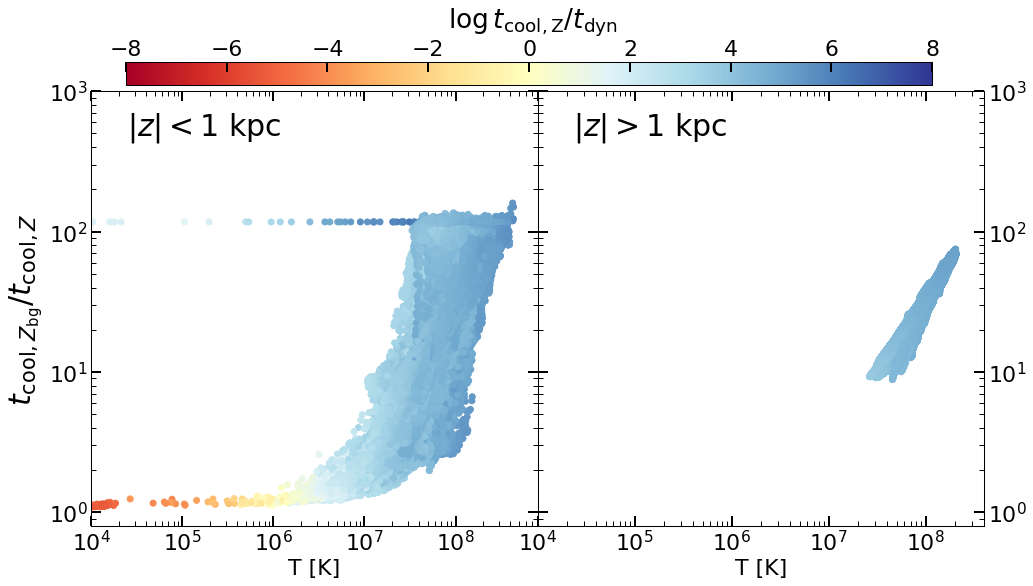

In [35]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(16,8))

cbarx = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7

dx1 = 0.4
cbtitlex = 0.1



tmask = (temp>1.e4)
outflow = (np.abs(zrange)>kpc)*tmask
disc = (np.abs(zrange)<kpc)*tmask

plot = ax[0].scatter(temp[disc].flatten(), tcool_ratio[disc].flatten(), \
                        c=np.log10(tcool_tdyn[disc]).flatten(), 
                        cmap='RdYlBu', vmin=-8, vmax=8.)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(-8, -6, -4, -2.,  0.0,  2., 4.0, 6.0, 8.0 ))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\log t_{\rm cool,Z}/ t_{\rm dyn}$")



plot = ax[1].scatter(temp[outflow].flatten(), tcool_ratio[outflow].flatten(), \
                        c=np.log10(tcool_tdyn[outflow]).flatten(), 
                        cmap='RdYlBu', vmin=-8, vmax=8.)


ax[0].tick_params(axis='y', which='both', right=True, left=True)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

ax[0].tick_params(axis='x', which='both', top=True)
ax[1].tick_params(axis='x', which='both', top=True)
ax[0].set_ylabel(r"$t_{{\rm cool},{Z_{\rm bg}}}/t_{{\rm cool},Z}$", fontsize=30)
plt.setp(ax, 'xscale',('log'))
plt.setp(ax, 'yscale',('log'))
plt.setp(ax, 'xlim', (1.e4, 8.e8))
plt.setp(ax[1], 'xlim', (1.e4, 4.e8))
plt.setp(ax, 'ylim', (0.8, 1.e3))
# ax[0].set_title('Outflow')
# ax[1].set_title('Disc')
plt.setp(ax, 'xlabel', 'T [K]')

ax[0].text(0.08, 0.9, '$|z|<1$ kpc', transform=ax[0].transAxes, fontsize=30)
ax[1].text(0.08, 0.9, '$|z|>1$ kpc', transform=ax[1].transAxes, fontsize=30)
# plt.savefig(os.path.join(fig_path, "Paper", "tcool_met_Zsol.jpeg"), bbox_inches='tight', dpi=160)

In [ ]:
### fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(18,8))

bins = np.logspace(0., 2, 100)
outflow = (np.abs(zrange)>1000.*pc)
disc = (np.abs(zrange)<1000.*pc)


outvol_weighted, bin_edges = np.histogram((tcool_ratio[:,outflow]), bins=bins)  
discvol_weighted, bin_edges = np.histogram((tcool_ratio[:,disc]), bins=bins)  

outmass_weighted, bin_edges = np.histogram((tcool_ratio[:,outflow]), bins=bins, weights=rho_gas[:,outflow])
discmass_weighted, bin_edges = np.histogram((tcool_ratio[:,disc]), bins=bins, weights=rho_gas[:,disc])

ax[0].plot((bin_edges[:-1]), outvol_weighted/np.sum(outvol_weighted), ls='--', lw=3.0, label='Volume weighted')
ax[0].plot((bin_edges[:-1]), outmass_weighted/np.sum(outmass_weighted), ls='-', lw=3.0, )

ax[1].plot(bin_edges[:-1], discvol_weighted/np.sum(discvol_weighted), ls='--', lw=3.0, )
ax[1].plot(bin_edges[:-1], discmass_weighted/np.sum(discmass_weighted),ls='-', lw=3.0,  label = 'Mass weighted')

ax[0].tick_params(axis='y', which='both', right=True, left=True)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)
plt.setp(ax, 'xlabel', (r"$t_{{\rm cool},{Z_{\odot}}}/t_{{\rm cool},Z}$"))
plt.setp(ax, 'yscale',('log'))
plt.setp(ax, 'xscale',('log'))

plt.setp(ax, 'xlim', (0.5, 40.))
# plt.setp(ax[0], 'xlim', (1.e4, 9.e8))
plt.setp(ax, 'ylim', (9.e-6, 1.2))

ax[0].set_title('Outflow')
ax[1].set_title('Disc')
ax[0].legend()
ax[1].legend(loc='upper right')


In [ ]:
cloudy_H_mass_fraction = 1. / (1. + 0.1 * 3.971)
X = cloudy_H_mass_fraction
Zbg = 1.0
Z  =  0.02*Zbg
Y = 1. - X - Z
mean_metals_A = 16.
sigma_T = 6.6524e-25
T_cmb = 2.725
E_cmb = 7.5e-15 * (T_cmb * T_cmb * T_cmb * T_cmb)
electron_mass_cgs = m_e = 9.1e-28

/jobfs/131515001.gadi-pbs/ipykernel_1217903/2824446117.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(Zmet),\
/jobfs/131515001.gadi-pbs/ipykernel_1217903/2824446117.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[2].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(temp),\
/jobfs/131515001.gadi-pbs/ipykernel_1217903/2824446117.py:39: MatplotlibDeprecationWarning: shading='flat' whe

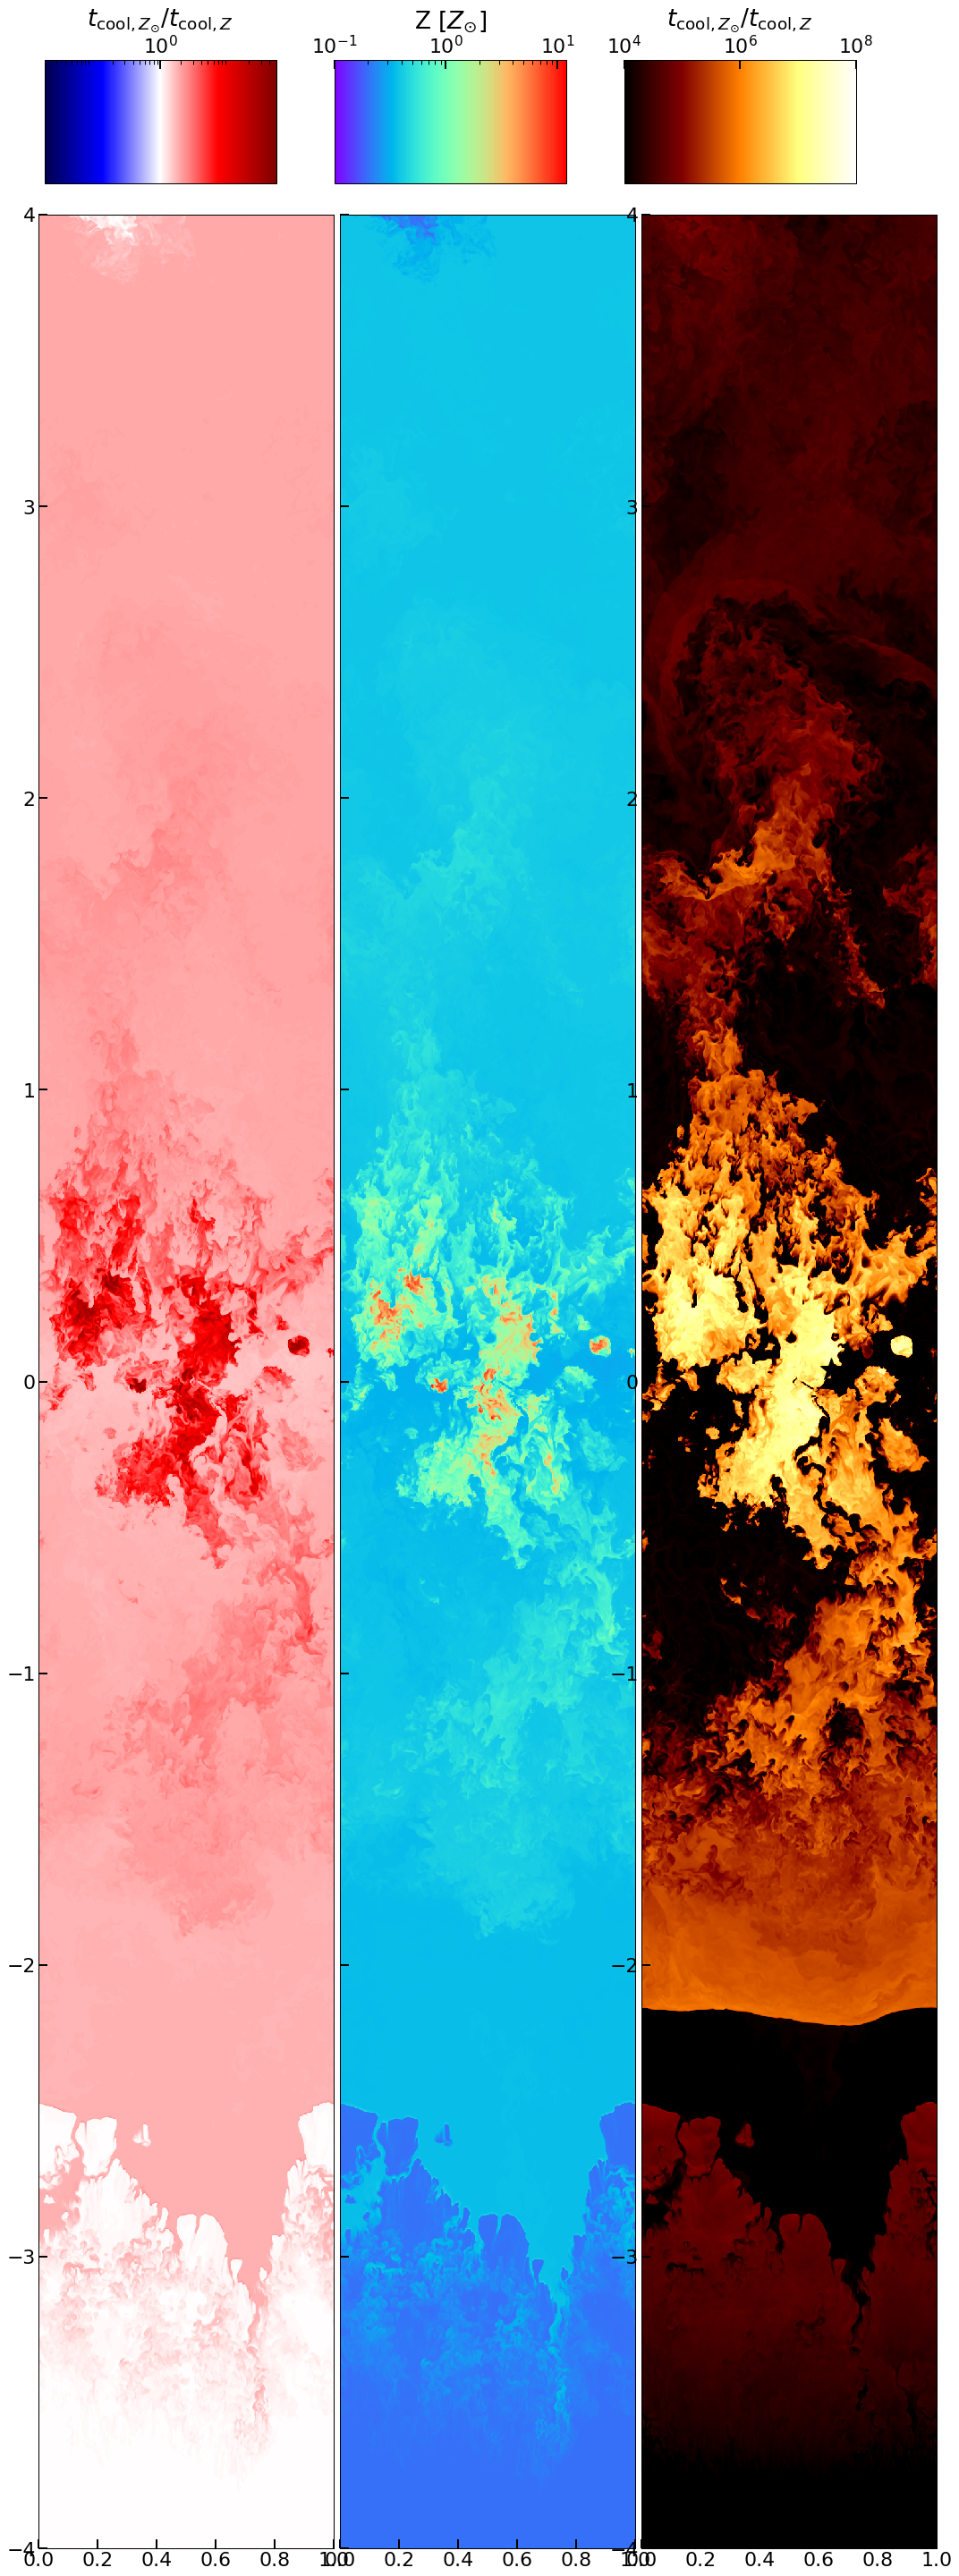

In [127]:
fig, ax = plt.subplots(1, 3, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(18, 48))
i=0

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.2
dx1 = 0.25
cbtitlex = 0.1
cbtitley = 16.5


# plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(rho_gas)/mp,\
#                     norm=mcolors.LogNorm(vmin=1.e-6, vmax=1.),
#                     cmap='Blues')
# cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
# fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-6,  1.e-2, 1., 1.e2))
# cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\rho$" + "\n" + "[g cm$^{-3}$]")

plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(Zmet),\
                    norm=mcolors.LogNorm(vmin=0.1, vmax=12.),
                    cmap='rainbow')
cax = fig.add_axes([cbarx + dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.1, 1.0, 10. ))
cax.xaxis.set_ticks_position('top')
cax.set_title(r"Z" + r" [$Z_{\odot}$]")


plot = ax[2].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(temp),\
                    norm=mcolors.LogNorm(vmin=1.e4, vmax=1.e8),
                    cmap='afmhot')
cax = fig.add_axes([cbarx + 2.*dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e4, 1.e6, 1.e8))
cax.xaxis.set_ticks_position('top')
cax.set_title(r"$t_{{\rm cool},{Z_{\odot}}}/t_{{\rm cool},Z}$")


plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tcool_ratio),\
                    norm=mcolors.LogNorm(vmin=2.e-2, vmax=50.),
                    cmap='seismic')
cax = fig.add_axes([cbarx , cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(1.e-6, 1.e-4, 1.e-2, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r"$t_{{\rm cool},{Z_{\odot}}}/t_{{\rm cool},Z}$")

ax[2].plot(xrange[328]/kpc, zrange[2069]/kpc, '*', markersize=26, color='black')

ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=True)

# plt.setp(ax, 'ylim', (-0.01,8.))